In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from joblib import load
%matplotlib inline

In [2]:
ica =   load('ica_master.pkl')
df =  pd.read_csv('labels.csv', index_col='Index')
df.head()

/home/jaidevd/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.decomposition.fastica_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/jaidevd/anaconda3/lib/python3.6/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator FastICA from version 0.21.3 when using version 0.23.dev0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


,File,Does this sound like a unique call recepient?,Can the original recording be heard?,Are there human voices?,Remarks
Index,,,,,
1,1.wav,No,No,Yes,Original recepient and someone's answering mac...
2,2.wav,No,No,No,Two answering machines - one same as the previ...
3,3.wav,Yes,No,Yes,"The voice from 1.wav, saying hello only once a..."
4,4.wav,No,No,No,Someone yelling in the beginning - faint voice...
5,5.wav,No,No,Yes,"Multiple human voices, a horn, feeble replicat..."


In [3]:
is_unique = df[df.columns[1]]
is_unique = is_unique ==  'Yes'

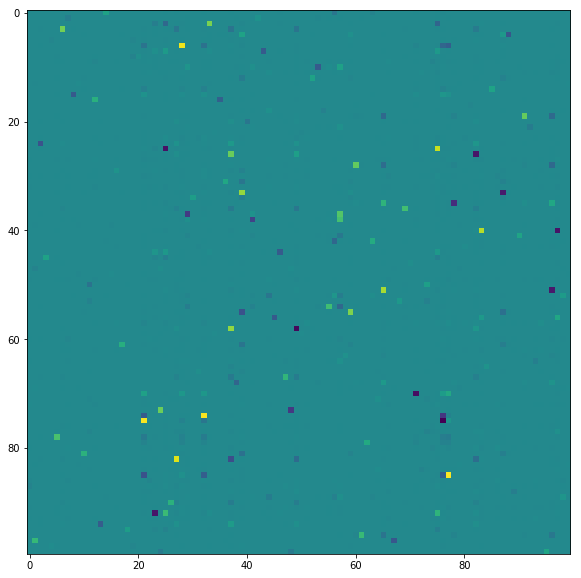

In [8]:
fig, ax = plt.subplots(figsize=(10,  10))
ax.imshow(ica.components_)

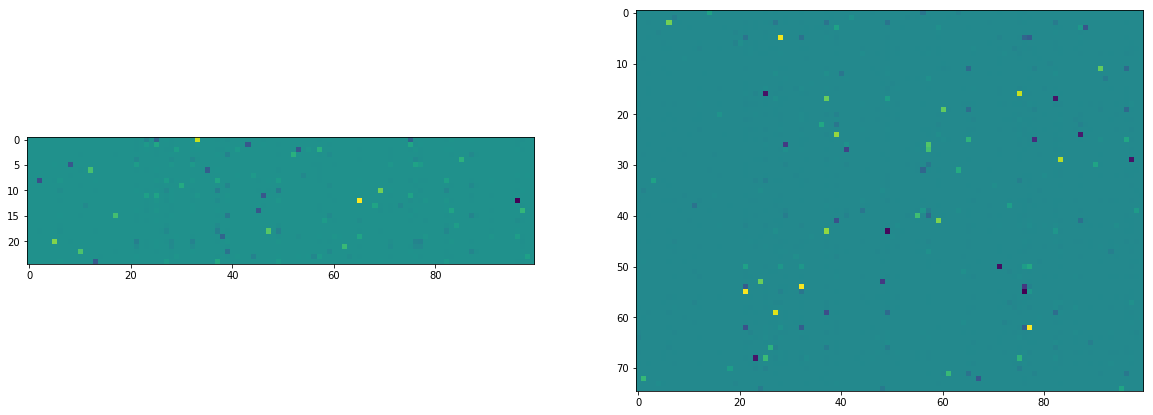

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax[0].imshow(ica.components_[is_unique.values,  :])
ax[1].imshow(ica.components_[np.logical_not(is_unique.values),  :])

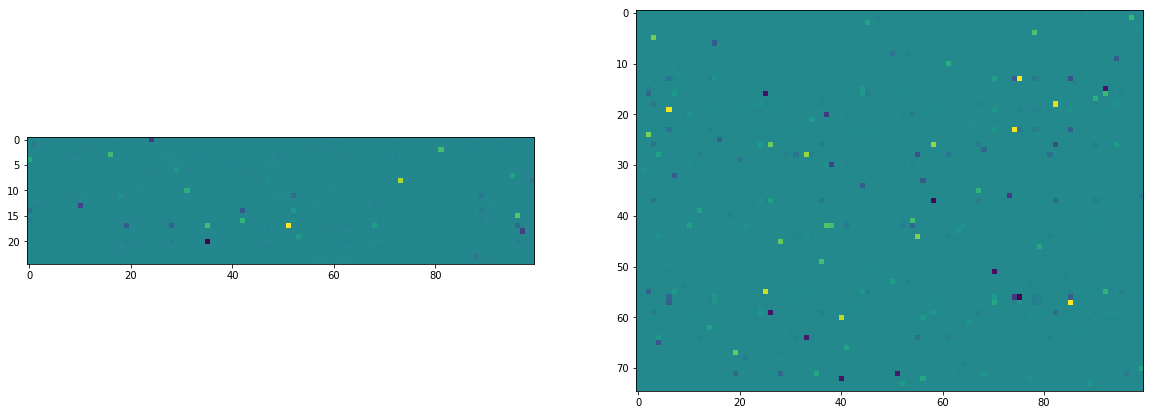

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax[0].imshow(ica.components_.T[is_unique.values,  :])
ax[1].imshow(ica.components_.T[np.logical_not(is_unique.values),  :])

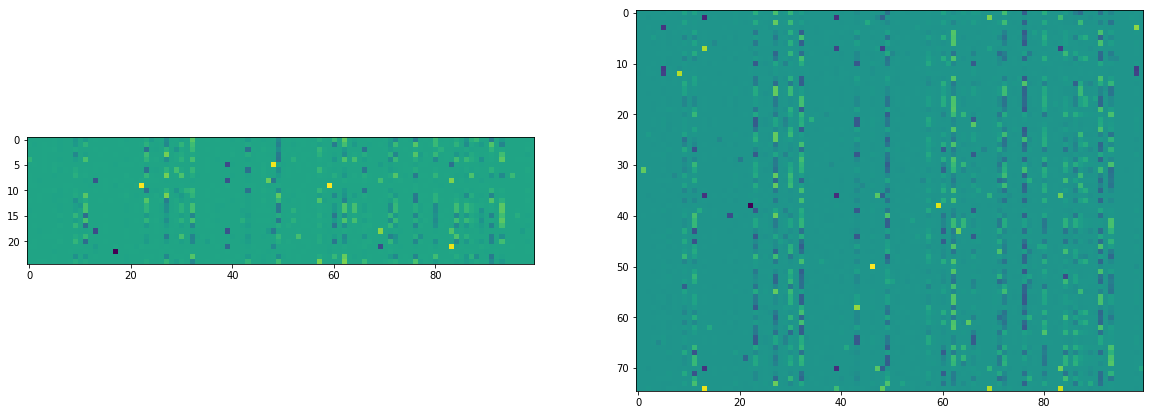

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax[0].imshow(ica.mixing_[is_unique.values,  :])
ax[1].imshow(ica.mixing_[np.logical_not(is_unique.values),  :])

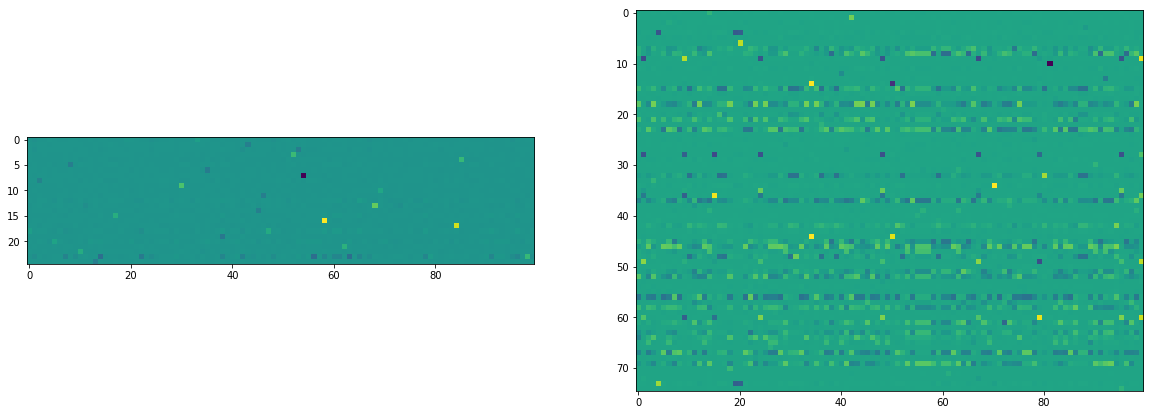

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax[0].imshow(ica.mixing_.T[is_unique.values,  :])
ax[1].imshow(ica.mixing_.T[np.logical_not(is_unique.values),  :])

In [21]:
X = ica.components_[is_unique.values,  :]
Y = ica.components_[np.logical_not(is_unique.values),  :]

In [22]:
X.shape

(25, 100)

In [23]:
Y.shape

(75, 100)

In [37]:
np.linalg.matrix_rank(X, tol=1e-9)

25

In [36]:
np.linalg.matrix_rank(Y, tol=1e-9)

75

In [26]:
from sklearn.decomposition  import TruncatedSVD

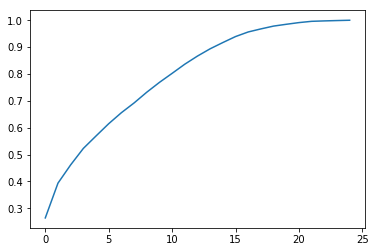

In [28]:
tsvd_x = TruncatedSVD(n_components=25)
tsvd_x.fit(X)
plt.plot(np.cumsum(tsvd_x.explained_variance_ratio_))

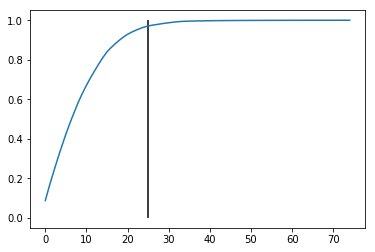

In [31]:
tsvd_y = TruncatedSVD(n_components=75)
tsvd_y.fit(Y)
plt.plot(np.cumsum(tsvd_y.explained_variance_ratio_))
plt.vlines(25, 0, 1)

In [38]:
xhat = tsvd_x.transform(X)
yhat = tsvd_y.transform(Y)

In [43]:
np.linalg.matrix_rank(xhat, tol=1e-6)

22

In [44]:
np.linalg.matrix_rank(yhat, tol=1e-6)

35

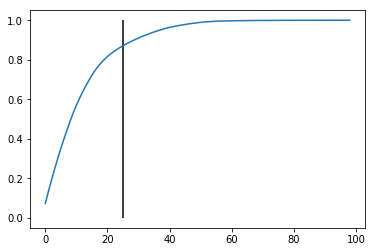

In [48]:
tsvd = TruncatedSVD(n_components=99)
tsvd.fit(ica.components_)
plt.plot(np.cumsum(tsvd.explained_variance_ratio_))
plt.vlines(25,  0, 1)